# 제주 핫 플레이스 지도에 표시하기

### 1. 데이터 준비

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [2]:
import pandas as pd
raw_df = pd.read_csv(filename)
raw_df.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [3]:
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [4]:
location_counts.tail()

,place
맛있는 제주,1
제주마로 펜션,1
중문국수나라,1
니모메빈티지라운지,1
월정곰닭,1


In [5]:
location_counts.to_csv('location_counts.csv')

In [6]:
loc_df = pd.read_csv('location_counts.csv')
loc_df.columns = ['지명','빈도']
loc_df.head()

,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59


### 2. 카카오 검색 API를 이용한 장소 검색
* 키워드 장소 검색

In [8]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving kakaoapikey.txt to kakaoapikey.txt


In [9]:
with open(filename) as f:
    api_key = f.read()

In [10]:
import requests
from urllib.parse import quote

In [11]:
keyword = '정방폭포'
search_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{search_url}?query={quote(keyword)}'
# Authorization: KakaoAK {REST_API_KEY}
result = requests.get(url,
                      headers={"Authorization": f'KakaoAK {api_key}'}).json()
result['documents'][0]

{'address_name': '제주특별자치도 서귀포시 동홍동 299-3',
 'category_group_code': '',
 'category_group_name': '',
 'category_name': '여행 > 관광,명소 > 폭포',
 'distance': '',
 'id': '10717401',
 'phone': '064-733-1530',
 'place_name': '정방폭포',
 'place_url': 'http://place.map.kakao.com/10717401',
 'road_address_name': '',
 'x': '126.571605283591',
 'y': '33.2449966137286'}

In [12]:
import numpy as np
import re

In [13]:
def find_place(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                headers={"Authorization": f'KakaoAK {api_key}'}).json()
    try:
        name = result['documents'][0]['place_name']
        if '제주특별자치도' not in result['documents'][0]['address_name']:
          lng= np.nan
          lat= np.nan
        else:
          lng = float(result['documents'][0]['x'])
          lat = float(result['documents'][0]['y'])
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan

    return name, lng, lat, keyword

In [14]:
find_place('제주공항')

('제주국제공항', 126.492769004244, 33.5070789578184, '제주공항')

In [15]:
re.sub('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 0-9]','', '광안리 해수욕장 - 廣安里海水浴場 GwangalliBeach, Busan, South Korea')

'광안리 해수욕장      '

In [16]:
# loc_df에 공식명칭, 위도, 경도 정보 추가
name_list, lng_list, lat_list = [],[],[]
for place in loc_df.지명:
    place = re.sub('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 0-9]','', place).strip()
    if place:
      name, lng, lat, _ = find_place(place)
    else:
      name, lng, lat ='', np.nan, np.nan
    name_list.append(name)
    lng_list.append(lng)
    lat_list.append(lat)

제주고궁한복카페
위미2리 동백군락지
제주 꿈꾸는고래 스쿠버게스트하우스
제주 성산 신산포구자연산횟집 회포장
까사 린다 펜션
아날로그감귤체험
해발1950 한라산 백록담
성산일출봉 게스트하우스 파티 띵까게스트하우스
함덕반하다
스윗슬로
애월해안가
윗세오름해발 1700
하얏트 리젠시 제주ㅣ
제주 조류공원 화조원
제스토리 바이제주 제주감성소품
빨간모자마법사
2월22일 브런치카페
비브레이브 커피 로스터즈
쌀다방
제주 서귀포 그릴 데미그라스
붉은못허브팜   애월본점
블랙하우스 떡볶이레스토랑
키아스마
미풍해장국  중앙점
미미본가
김녕 앞바다
핸드테일러 제주점
군산 정상
비양도 해녀촌
큰엉전망대쉼터
카페모리베이커스트리트
저녁정원
제주도 하늘 위
카페바띠
제주신화월드 메리어트 리조트관
바굥식당
단디501
카페하도섬엠스테이펜션
인공위성 제주
미나마라
머스태쉬커피머스태쉬하우스
홍대 깐풍기브라더스
백리향백반
원더먼트제주
목수금토일
의 한모신의 한모
8월의크리스마스 초원사진관
곽지스테이션
한복입는 선흘집
한라산 정상 해발 1950
알뜨르프로젝트2018
새별오름 정상
기원뚝배기
새우조나단
목포고을 제주도 흑돼지 끝나는 맛
타시텔레
제주아트리움비밀의그림자공연
제주초가집 곱들락
더커피브루
성산일출봉 코앞 쉼터
네이처캔바스
해물뚝배기전문 재암식당
여수 앞바다
기쁨이네 감자탕
블루마린하우스
테라로사이사랑
다만프레르제주신화점
제주카페 스르륵
돈테일러익스프레
릴리펏 제주점 메종글래드호텔
유리의성과마법의숲
중문 마린파크 퍼시픽랜드
유채꽃사진촬영소
블루밍아일랜드
선화동1061
소자38
몽구네민박
쭈니창고
오샹띠
한화아쿠아넷
몽키비치
헤이미쉬제주제주독채펜션
청초수물회섭국 신관
라비에 와인비스트로
호끌락80번지
정방폭포가 보이는 암벽위
하워드존슨 제주 연동 호텔
평화통일불사리탑사
동탄2에 산다
건축카페  섶섬이보이는
제주도 올레길 6코스 이중섭거리
접대  저번에 우리가 만났던 그때
빌리엔젤 제주노형점
제주마라도잠수함
오마주마카롱
서귀동 2985 세계의 가정식
제주도가는 비행기 안
성산수구레국밥
섶섬해녀할망

In [17]:
loc_df['공식명칭'] = name_list
loc_df['위도'] = lat_list
loc_df['경도'] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,,NaN,NaN
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,,NaN,NaN
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858


In [18]:
loc_df.tail()

,지명,빈도,공식명칭,위도,경도
1022,맛있는 제주,1,맛있는제주,NaN,NaN
1023,제주마로 펜션,1,마로펜션,33.398407,126.246324
1024,중문국수나라,1,중문국수나라,33.256262,126.425456
1025,니모메빈티지라운지,1,니모메,33.493701,126.430921
1026,월정곰닭,1,월정곰닭,NaN,NaN


In [19]:
# Null 데이터 유무 확인
loc_df.isnull().sum()

지명        0
빈도        0
공식명칭      0
위도      306
경도      306
dtype: int64

In [20]:
loc_df.isna().sum()

지명        0
빈도        0
공식명칭      0
위도      306
경도      306
dtype: int64

In [21]:
# Null 데이터 삭제
total_df = loc_df.dropna()            # Null 값이 있는 행을 삭제
total_df.isnull().sum().sum()

0

### 3. 공식명칭으로 데이터 합치기

In [22]:
# 공식명칭 중복 여부 
total_df.공식명칭.value_counts()[:10]

올레길 7코스(서귀포-월평 올레)    6
함덕해수욕장                4
동문재래시장                4
이호테우해수욕장              3
비자림                   3
세화해변                  3
우도                    3
협재해수욕장                3
한라산국립공원               3
제주중문관광단지              3
Name: 공식명칭, dtype: int64

In [25]:
df= total_df.pivot_table('빈도', index=['공식명칭','위도','경도'], aggfunc='sum')
df.head()

,,,빈도
공식명칭,위도,경도,
1158족욕카페,33.467075,126.336504,1
702키친,33.498835,126.534134,1
가드망제,33.500991,126.532954,1
가시식당,33.353060,126.771438,2
가시아방국수,33.438605,126.918065,3


In [26]:
df.reset_index(inplace=True)
df.공식명칭.value_counts()[:5]

효섬마을초가집     1
다이브스테이      1
호텔휘슬락       1
서귀포흑돼지명가    1
다랑쉬오름       1
Name: 공식명칭, dtype: int64

In [28]:
df.tail()

,공식명칭,위도,경도,빈도
645,휘닉스제주섭지코지 방두포등대,33.427452,126.933613,1
646,휘닉스제주섭지코지 제주,33.430497,126.928187,1
647,휴애리자연생활공원,33.309410,126.635410,11
648,흑돼지가있는풍경 본점,33.475376,126.480646,1
649,히든클리프호텔&네이쳐,33.254776,126.402595,5


In [30]:
df.to_csv('공식명칭.csv', index=False)

### 4. Follium 시각화

* 1. 개별표시

In [31]:
df.sort_values(by='빈도', ascending=False).head(10)

,공식명칭,위도,경도,빈도
190,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
465,제주에인감귤밭,33.256561,126.539014,48
270,성산일출봉,33.459135,126.940538,38
573,폼포코식당,33.450408,126.919065,30
596,한라산1100고지,33.358078,126.462220,25
407,위미동백나무군락,33.272939,126.674731,24
405,월정리해수욕장,33.556469,126.795805,22
383,올레길 7코스(서귀포-월평 올레),33.237386,126.515310,21
20,고집돌우럭 중문점,33.257981,126.416705,21
624,협재해수욕장,33.393866,126.239158,20


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


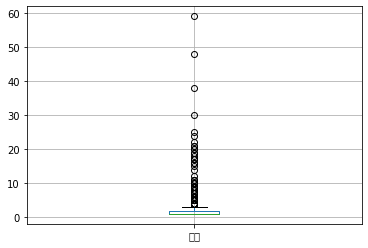

In [32]:
df[['빈도']].boxplot()

In [33]:
import folium

In [38]:
Mt_Hanla= [33.3625, 126.533694]
map= folium.Map(location=Mt_Hanla, zoom_start=10)

for i in df.index:
  folium.CircleMarker(
      radius= int(df.빈도[i])*2,
      location=[df.위도[i], df.경도[i]],
      popup= df.공식명칭[i],
      tooltip = df.공식명칭[i],
      color= 'crimson'
  ).add_to(map)
map

title= '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [43]:
map.save('제주도 핫플레이스(개별).html')

* 2.  그룹으로 표시

In [39]:
from folium.plugins import MarkerCluster

locations, names =[ ], [ ]
for i in df.index:
  locations.append([df.위도[i], df.경도[i]])
  names.append(df.공식명칭[i])

In [40]:
map =folium.Map(location=Mt_Hanla, zoom_start=10)

MarkerCluster(
    locations=locations, popups = names,
    name='제주', overlay=True, control=True
  ).add_to(map)

title = '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [41]:
map.save('제주도 핫플레이스(그룹).html')